## DA Assessment

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 Data Cleaning & Exploration

### 1.a. Import the dataset and take a look at the first few rows, check for null values and duplicates.

In [543]:
df = pd.read_csv('dataset.csv')# importing the dataset
data = df
data.head()

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14


In [544]:
data.info()#to find if we have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          250 non-null    object 
 1   Category            250 non-null    object 
 2   Supplier            250 non-null    object 
 3   Warehouse_Location  250 non-null    object 
 4   Order_Date          250 non-null    object 
 5   Delivery_Date       250 non-null    object 
 6   Inventory_Level     250 non-null    int64  
 7   Stockouts           250 non-null    int64  
 8   Unit_Cost           250 non-null    float64
 9   Lead_Time           250 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 19.7+ KB


In [545]:
duplicates = data.duplicated().sum()# to find if we have any duplicate values
print(f"Number of duplicate rows: {duplicates}") # no duplicate values found

Number of duplicate rows: 0


In [546]:
#to find the lead time is calculated correctly or not
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Delivery_Date'] = pd.to_datetime(data['Delivery_Date'])
data['Calculated_Lead_Time'] = (data['Delivery_Date'] - data['Order_Date']).dt.days
(data['Calculated_Lead_Time'] == data['Lead_Time']).value_counts()

True     184
False     66
Name: count, dtype: int64

In [547]:
data['Lead_Time'] = data['Calculated_Lead_Time']
data.drop(columns=['Calculated_Lead_Time'], inplace=True)

In [548]:
#extracting month from order date and delivery date
data['Order_Month'] = data['Order_Date'].dt.month
data['Delivery_Month'] = data['Delivery_Date'].dt.month

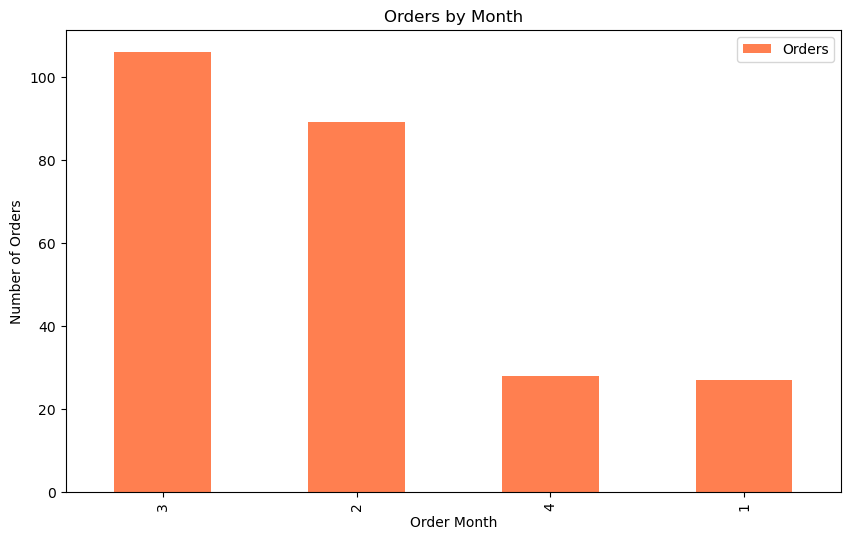

,Orders
Order_Month,
3,106
2,89
4,28
1,27


In [549]:
#Most orders are placed in which month
orders_by_month = data.groupby('Order_Month').size().reset_index(name='Orders').set_index('Order_Month').sort_values(by='Orders', ascending=False)
orders_by_month.plot(kind='bar', figsize=(10,6), color='coral')
plt.title('Orders by Month')
plt.xlabel('Order Month')
plt.ylabel('Number of Orders')
plt.show()
orders_by_month

In [550]:
#max in order_date
max_order_date = data['Order_Date'].max()
print(f"Maximum Order Date: {max_order_date}")
max_delivery_date = data['Delivery_Date'].max()
print(f"Maximum Delivery Date: {max_delivery_date}")

Maximum Order Date: 2025-04-10 00:00:00
Maximum Delivery Date: 2025-04-29 00:00:00


In [551]:
#max inventory level
max_inventory_level = data['Inventory_Level'].max()
print(f"Maximum Inventory Level: {max_inventory_level}")  
#max_inventory level in which month
max_inventory_month = data.loc[data['Inventory_Level'].idxmax(), 'Order_Month']
print(f"Month with Maximum Inventory Level: {max_inventory_month}")  
#min inventory level
min_inventory_level = data['Inventory_Level'].min()
print(f"Minimum Inventory Level: {min_inventory_level}")  
#min inventory level in which month
min_inventory_month = data.loc[data['Inventory_Level'].idxmin(), 'Order_Month']
print(f"Month with Minimum Inventory Level: {min_inventory_month}")
#max inventory in which location
max_inventory_location = data.loc[data['Inventory_Level'].idxmax(), 'Warehouse_Location']
print(f"Location with Max Inventory Level: {max_inventory_location}")
#min inventory in which location
min_inventory_location = data.loc[data['Inventory_Level'].idxmin(), 'Warehouse_Location']
print(f"Location with Minimum Inventory Level: {min_inventory_location}")

Maximum Inventory Level: 499
Month with Maximum Inventory Level: 4
Minimum Inventory Level: 1
Month with Minimum Inventory Level: 2
Location with Max Inventory Level: New York
Location with Minimum Inventory Level: Chicago


In [552]:
# min and max of unit_cost
print(f"Minimum Unit Cost: {data['Unit_Cost'].min()}")
print(f"Maximum Unit Cost: {data['Unit_Cost'].max()}")

Minimum Unit Cost: 5.57
Maximum Unit Cost: 493.75


In [553]:
data.head()

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time,Order_Month,Delivery_Month
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6,2,3
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18,2,3
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,17,1,2
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8,1,2
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14,3,3


In [554]:
print(f"Unique Values in cateogry are {data['Category'].nunique()} - values are {data['Category'].unique()}")
print(f"Unique Values in Supplier are {data['Supplier'].nunique()} - values are {data['Supplier'].unique()}")
print(f"Unique Values in Warehouse location are {data['Warehouse_Location'].nunique()} - values are {data['Warehouse_Location'].unique()}")

Unique Values in cateogry are 5 - values are ['Toys' 'Furniture' 'Food' 'Clothing' 'Electronics']
Unique Values in Supplier are 4 - values are ['Supplier B' 'Supplier C' 'Supplier D' 'Supplier A']
Unique Values in Warehouse location are 4 - values are ['Chicago' 'San Francisco' 'Dallas' 'New York']


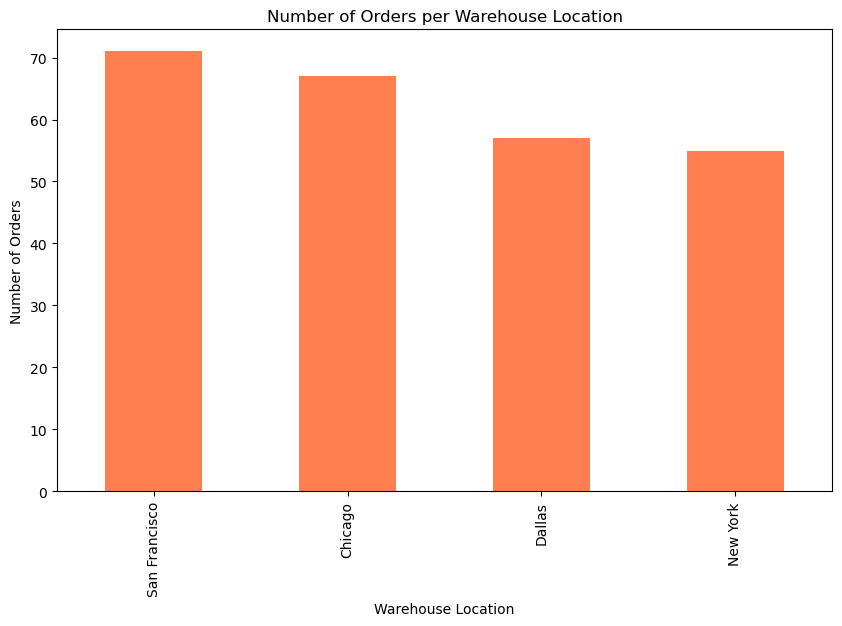

Warehouse_Location
San Francisco    71
Chicago          67
Dallas           57
New York         55
Name: count, dtype: int64

In [555]:
# to find which warehouse location has the highest number of orders
orders_per_warehouse = data['Warehouse_Location'].value_counts()
orders_per_warehouse.plot(kind='bar', figsize=(10,6), color='coral')
plt.title('Number of Orders per Warehouse Location')
plt.xlabel('Warehouse Location')
plt.ylabel('Number of Orders')
plt.show()
orders_per_warehouse

In [556]:
# to find which ware house location is maintaining better lead time
average_lead_time_per_warehouse = data.groupby('Warehouse_Location')['Lead_Time'].mean()
print(f"Average Lead Time per Warehouse Location:\n{average_lead_time_per_warehouse.round(2).sort_values()}")
# we can see that San Francisco warehouse is maintaining better lead time even on having highest number of orders


Average Lead Time per Warehouse Location:
Warehouse_Location
San Francisco    10.58
Chicago          10.87
New York         10.89
Dallas           10.91
Name: Lead_Time, dtype: float64


### 1.b. Calculations

#### Average delivery lead time per supplier

In [557]:
average_lead_time_per_supplier = data.groupby('Supplier')['Lead_Time'].mean().reset_index().sort_values(by='Lead_Time', ascending=False) # Average delivery lead time per supplier

##### as we can see above supplier D is having highest leadtime and Supplier B has the lowest

#### % of late deliveries per category

#### As there is no expected delivery column i am assuming the deliveries as late if the lead_time of that respective supplier is greater than the average lead time

In [558]:
supplier_avg_lead_time = data.groupby('Supplier')['Lead_Time'].mean().to_dict()

In [559]:
data['Is_Late'] = data.apply(lambda row:row['Lead_Time']>supplier_avg_lead_time[row['Supplier']],axis=1).astype(int)
data[['Supplier','Lead_Time','Is_Late']].head(10)

,Supplier,Lead_Time,Is_Late
0,Supplier B,6,0
1,Supplier C,18,1
2,Supplier B,17,1
3,Supplier D,8,0
4,Supplier A,14,1
5,Supplier D,21,1
6,Supplier D,17,1
7,Supplier A,5,0
8,Supplier C,6,0
9,Supplier A,18,1


In [560]:
percentage_late_delivery_per_supplier = data.groupby('Supplier')['Is_Late'].mean()*100
percentage_late_delivery_per_supplier.round(2).sort_values(ascending=False).reset_index()

,Supplier,Is_Late
0,Supplier A,56.90
1,Supplier D,53.23
2,Supplier B,52.31
3,Supplier C,41.54


In [561]:
percentage_late_delivery_per_category = data.groupby('Category')['Is_Late'].mean()*100

In [562]:
percentage_late_delivery_per_category.round(2).sort_values(ascending=False)

Category
Furniture      58.33
Food           52.94
Clothing       49.06
Electronics    46.94
Toys           46.94
Name: Is_Late, dtype: float64

In [563]:
print(f"Total Deliveries: {len(data)}")
print(f"Total Late Deliveries: {data['Is_Late'].sum()}")
print(f"Overall Percentage of Late Deliveries: {(data['Is_Late'].mean()*100).round(2)}%")   
print(f"Percentage of Late Deliveries per Category:\n{percentage_late_delivery_per_category.round(2).sort_values(ascending=False)}")

Total Deliveries: 250
Total Late Deliveries: 127
Overall Percentage of Late Deliveries: 50.8%
Percentage of Late Deliveries per Category:
Category
Furniture      58.33
Food           52.94
Clothing       49.06
Electronics    46.94
Toys           46.94
Name: Is_Late, dtype: float64


Text(0.5, 1.0, 'Percentage of Late Deliveries per Category')

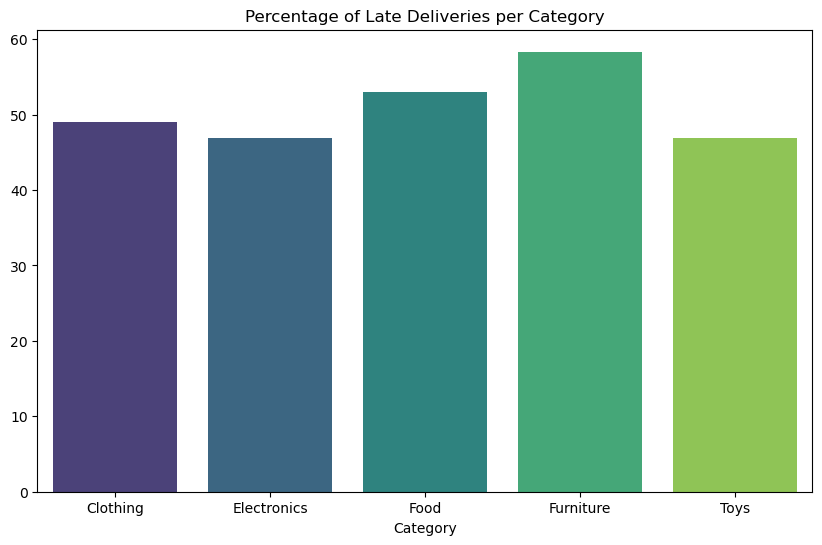

In [564]:
plt.figure(figsize=(10,6))
sns.barplot(x=percentage_late_delivery_per_category.index, y=percentage_late_delivery_per_category.values, palette='viridis')
plt.title('Percentage of Late Deliveries per Category')

###### Insight: Furniture category is having highest late percentage of delivers may be imporving logistics for this category will reduce the delays

### 1.c Stockout frequency per warehouse location

In [565]:
# to find which locations and categories are having stockouts
stockouts_per_warehouse = data['Warehouse_Location'][data['Stockouts'] == 1].value_counts().sort_values(ascending=False).reset_index()
print(f"Stockouts per Warehouse Location:\n{stockouts_per_warehouse}")

Stockouts per Warehouse Location:
  Warehouse_Location  count
0             Dallas     15
1      San Francisco     14
2           New York     11
3            Chicago      7


In [566]:
stockouts_per_category = data['Category'][data['Stockouts'] == 1].value_counts().sort_values(ascending=False).reset_index()
print(f"Stockouts per Category:\n{stockouts_per_category}")

Stockouts per Category:
      Category  count
0  Electronics     13
1         Food     10
2    Furniture      8
3         Toys      8
4     Clothing      8


Category,Clothing,Electronics,Food,Furniture,Toys
Warehouse_Location,,,,,
Chicago,0,3,1,1,2
Dallas,2,1,6,3,3
New York,4,2,1,3,1
San Francisco,2,7,2,1,2


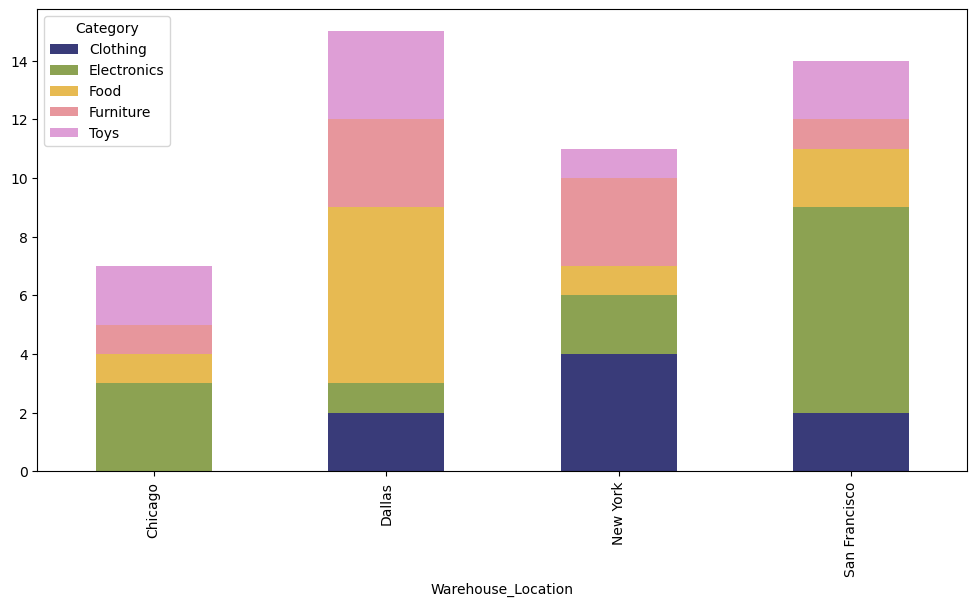

In [567]:
stockouts_grouped = (
    data[data['Stockouts'] == 1]
    .groupby(['Warehouse_Location', 'Category'])
    .size()
    .sort_values(ascending=False)
    .unstack(fill_value=0)
)
stockouts_grouped.plot(kind='bar', stacked=True, figsize=(12, 6),colormap='tab20b')
stockouts_grouped

#### Lets find out in what months stockouts are happening

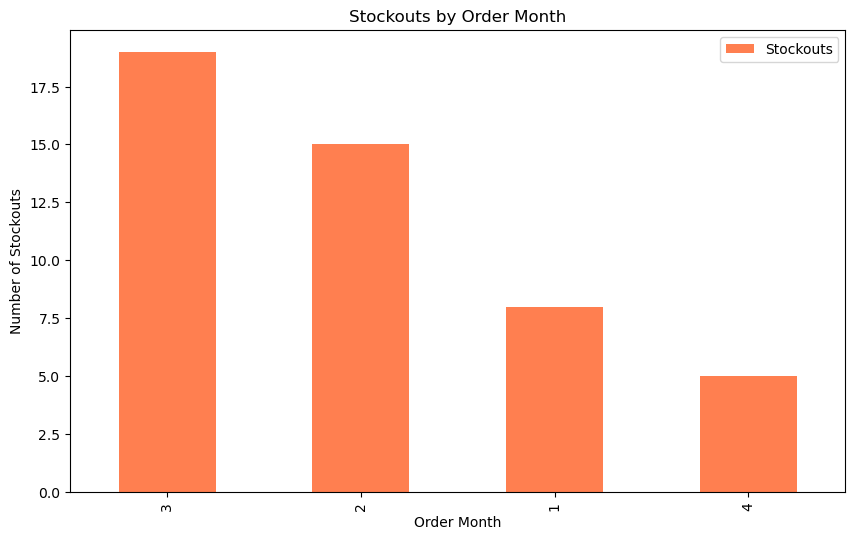

,Stockouts
Order_Month,
3,19
2,15
1,8
4,5


In [568]:
stockouts_by_order_month = data[data['Stockouts'] == 1].groupby('Order_Month').size().reset_index(name='Stockouts').set_index('Order_Month').sort_values(by='Stockouts', ascending=False)
stockouts_by_order_month.plot(kind='bar', figsize=(10,6), color='coral')
plt.title('Stockouts by Order Month')
plt.xlabel('Order Month')
plt.ylabel('Number of Stockouts')
plt.show()
stockouts_by_order_month 

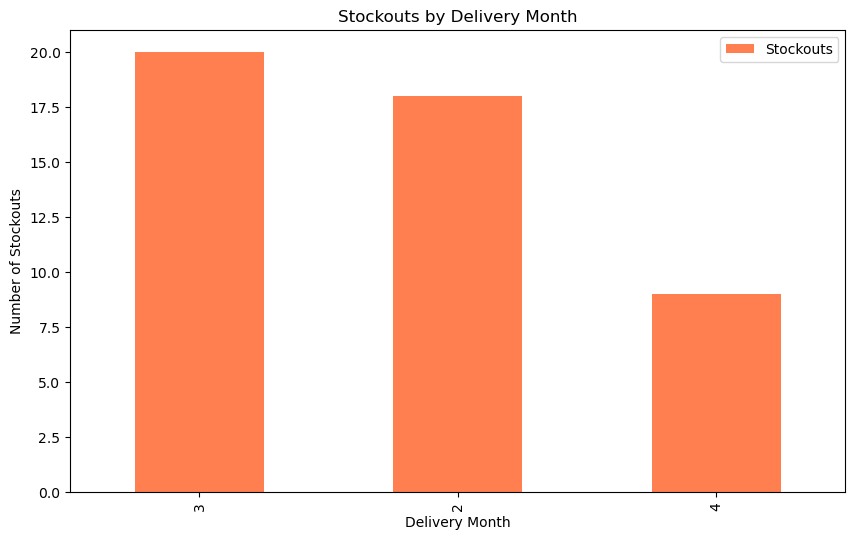

,Stockouts
Delivery_Month,
3,20
2,18
4,9


In [569]:
stockouts_by_delivery_month = data[data['Stockouts'] == 1].groupby('Delivery_Month').size().reset_index(name='Stockouts').set_index('Delivery_Month').sort_values(by='Stockouts', ascending=False)
stockouts_by_delivery_month.plot(kind='bar', figsize=(10,6), color='coral')
plt.title('Stockouts by Delivery Month')
plt.xlabel('Delivery Month')
plt.ylabel('Number of Stockouts')
plt.show()
stockouts_by_delivery_month 

## Task 2 Analysis and KPIs

#### 2.a As we dont have daily usage data i am assuming inventory level/lead_time as average_daily_usage and calculating Reorder Point from it

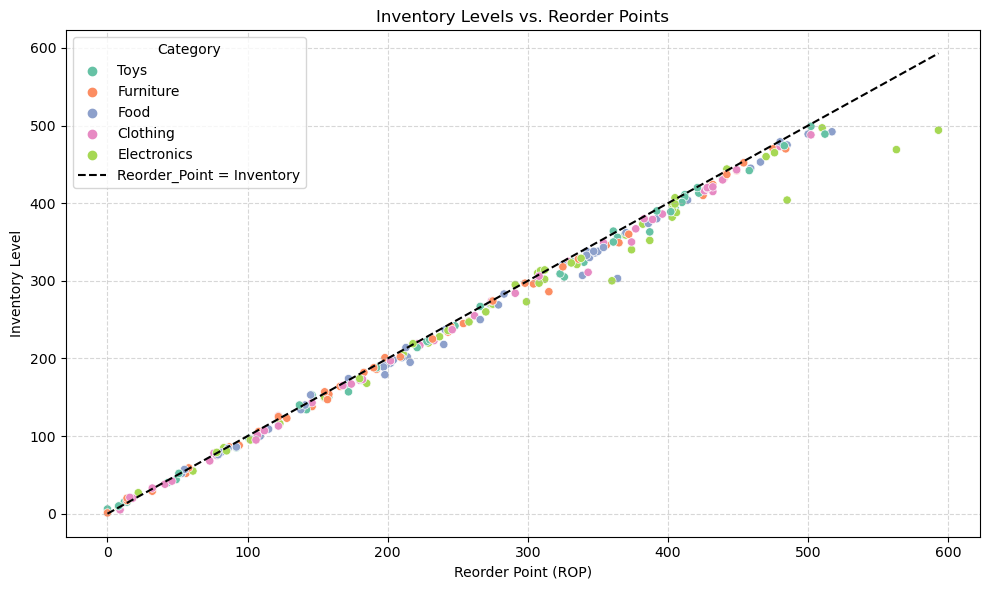

,Inventory_Level,Avg_Daily_Usage,Safety_Stock,Reorder_Point
166,437,23.0,5.0,442.0
25,98,8.0,2.0,106.0
217,165,15.0,3.0,168.0
102,434,36.0,7.0,439.0
178,488,38.0,8.0,502.0
223,350,117.0,23.0,374.0
32,410,59.0,12.0,425.0
191,380,27.0,5.0,383.0
79,97,9.0,2.0,101.0
142,340,170.0,34.0,374.0


In [570]:
data['Avg_Daily_Usage'] = (data['Inventory_Level'] / data['Lead_Time']).round()
data['Safety_Stock'] = (data['Avg_Daily_Usage'] * 0.2 ).round() # 20% buffer
data['Reorder_Point'] = (data['Avg_Daily_Usage'] * data['Lead_Time'] + data['Safety_Stock']).round()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Reorder_Point'], y=data['Inventory_Level'], hue=data['Category'], palette='Set2')
plt.plot([data['Reorder_Point'].min(), data['Reorder_Point'].max()], [data['Reorder_Point'].min(), data['Reorder_Point'].max()], 'k--', label='Reorder_Point = Inventory')
plt.title("Inventory Levels vs. Reorder Points")
plt.xlabel("Reorder Point (ROP)")
plt.ylabel("Inventory Level")
plt.legend(title="Category")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
data[['Inventory_Level', 'Avg_Daily_Usage', 'Safety_Stock', 'Reorder_Point']].sample(10)

#### 2.b Identify top 5 suppliers with highest late delivery rates

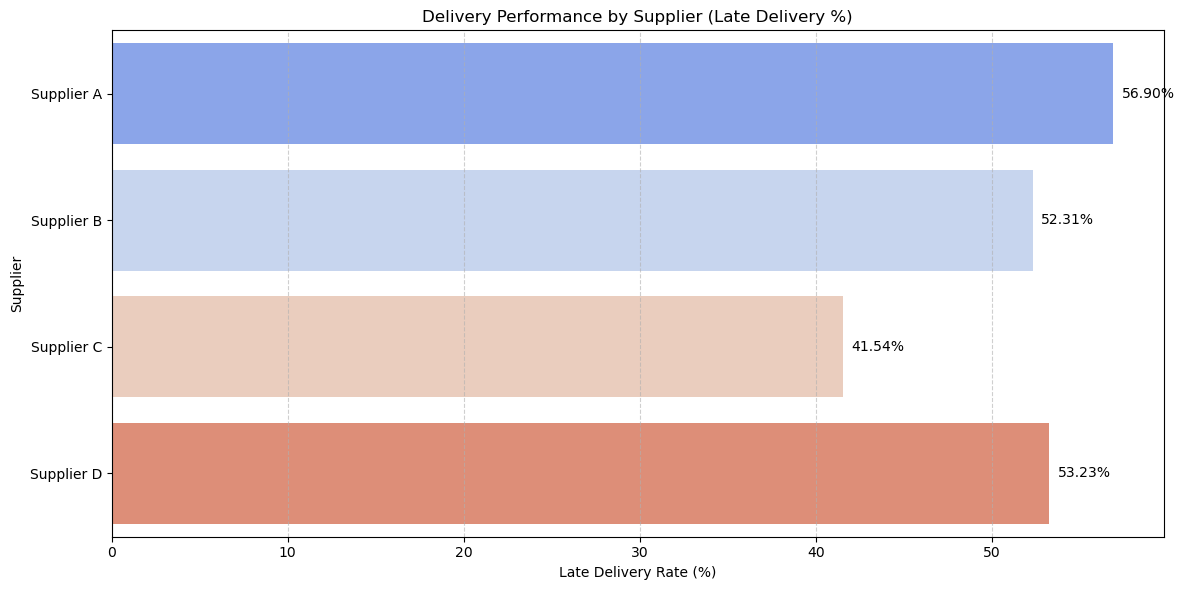

,Supplier,Is_Late
0,Supplier A,56.90
1,Supplier D,53.23
2,Supplier B,52.31
3,Supplier C,41.54


In [571]:
avg_late_delivery_per_supplier =  data.groupby('Supplier')['Is_Late'].mean().to_dict()
percentage_late_delivery_per_supplier = data.groupby('Supplier')['Is_Late'].mean()*100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=percentage_late_delivery_per_supplier.values, y=percentage_late_delivery_per_supplier.index, palette="coolwarm")
for i, (value, label) in enumerate(zip(percentage_late_delivery_per_supplier.values, percentage_late_delivery_per_supplier.index)):ax.text(value + 0.5, i, f"{value:.2f}%", va='center', fontsize=10)
plt.title("Delivery Performance by Supplier (Late Delivery %)")
plt.xlabel("Late Delivery Rate (%)")
plt.ylabel("Supplier")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
percentage_late_delivery_per_supplier.round(2).sort_values(ascending=False).reset_index()

#### 2.c Estimate cost savings if lead times improved by 10%

In [572]:
#To find savings if lead time improved by 10%
data['Improved_Lead_Time'] = (data['Lead_Time'] * 0.9).round(2)
data[['Improved_Lead_Time','Lead_Time']].sample(10)

,Improved_Lead_Time,Lead_Time
190,3.6,4
126,6.3,7
120,11.7,13
218,0.9,1
40,5.4,6
136,6.3,7
168,14.4,16
219,2.7,3
34,6.3,7
119,0.9,1


In [573]:
# Calculate the total cost
data['Total_Cost'] = data['Inventory_Level'] * data['Unit_Cost']
data['Total_Cost'].sample(10)

4      109714.41
15     164779.04
197     15603.00
174      8900.33
37      22310.64
127     46908.18
82      53113.90
95      13963.10
32      32267.00
247    125724.52
Name: Total_Cost, dtype: float64

In [574]:
# Assuming that there is a penalty of 10% if orders are delivered late
data['Late_Cost'] = data['Is_Late'] * data['Total_Cost'] * 0.10
data['Late_Cost'].sample(10)

87      6071.040
168      712.908
135    12476.034
12         0.000
66      2779.827
63      1062.684
96      2319.762
205    12752.289
126        0.000
120    14383.675
Name: Late_Cost, dtype: float64

In [575]:
data['Improved_Lead_Time'] = (data['Lead_Time'] * 0.9).round()
data['Is_Late_Improved'] = data.apply(
    lambda row: row['Improved_Lead_Time'] > avg_late_delivery_per_supplier[row['Supplier']], axis=1
)
data['Improved_Late_Cost'] = data['Is_Late_Improved'] * data['Total_Cost'] * 0.05

In [576]:
total_late_cost = data['Late_Cost'].sum()
improved_late_cost = data['Improved_Late_Cost'].sum()
cost_savings = total_late_cost - improved_late_cost

In [577]:
print(f"Total Late Cost Before Improvement: ${total_late_cost.round(2)}")
print(f"Total Late Cost After 10% Lead Time Improvement: ${improved_late_cost.round(2)}")
print(f"Cost Savings from Lead Time Improvement: ${ cost_savings.round(2)}")

Total Late Cost Before Improvement: $836916.01
Total Late Cost After 10% Lead Time Improvement: $804550.87
Cost Savings from Lead Time Improvement: $32365.13


<Axes: xlabel='Type', ylabel='Cost'>

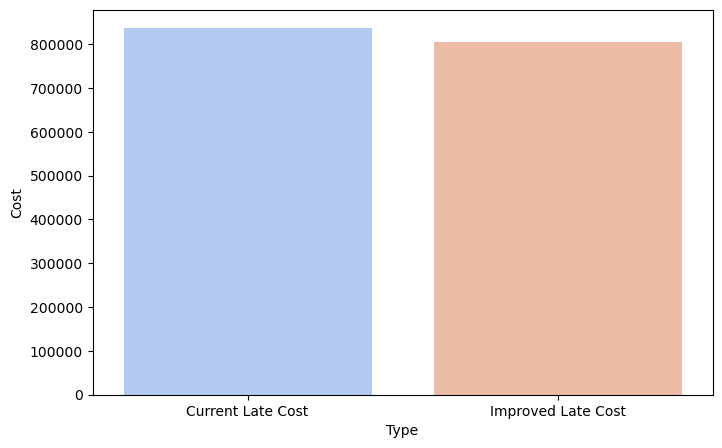

In [578]:
comparison_df = pd.DataFrame({
    'Type': ['Current Late Cost', 'Improved Late Cost'],
    'Cost': [total_late_cost, improved_late_cost]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x='Type', y='Cost', palette='coolwarm')